In [80]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### for blending

In [86]:
sub = pd.read_csv('./hard_blend.csv') 

### for single model

In [75]:
sub = pd.read_csv('./pred/vgg16_prob_v3.csv')
sub['label'] = sub[['A', 'B', 'C']].apply(lambda x: np.argmax(x, axis=0), axis=1)
sub = sub.drop(['A','B','C'], axis=1)

class_map ={0:'A',1:'B',2:'C'}
sub['label'] = sub['label'].map(class_map)

### start evaluate

In [87]:
ground_truth=pd.read_csv('../AImongo_img/dev.csv')
ground_truth.columns = sub.columns
ground_truth['image_ids'] = ground_truth['image_ids'].apply(lambda x:x[1:5])
ground_truth['image_ids'] = ground_truth['image_ids'].astype(int)

In [88]:
df =pd.merge(ground_truth,sub,how='left',on='image_ids')
df.columns= ['image_ids','y_true','y_pred']

In [89]:
accu = accuracy_score(df['y_true'],df['y_pred'])
print('Accuracy score:{}'.format(accu))

Accuracy score:0.805


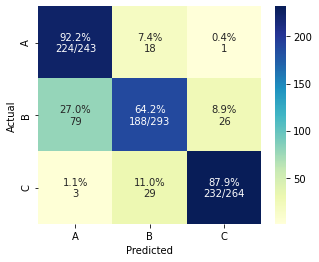

In [90]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(3,3)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="YlGnBu")
    #plt.savefig(filename)
    plt.show()

cm_analysis(df['y_true'],df['y_pred'], ['A','B','C'], ymap=None, figsize=(5,4))